<a href="https://colab.research.google.com/github/darshxm/dataset-suicides/blob/master/Digital_Medicine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/darshxm/dataset-suicides/master/Suicides%20in%20India%202001-2012.csv'
df = pd.read_csv(url)
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


Here, the dataset has been imported into a Pandas Dataframe, which will be easier to work with. The dataset has been taken from my github repository, which mentions the original source. It consists of suicide data from Indian states in alphabetical order which holds information like gender, education, age, etc. 

Now, some graphical analysis will identify the trends in suicide and hence I will further train my model according to my hypothesis and hence we will try to identify the risk of suicide for a given person.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
eduDf = df[df['Type_code']=='Education_Status']
causesDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

Important libraries have been imported. Columns between which graphs are to be made have been defined.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


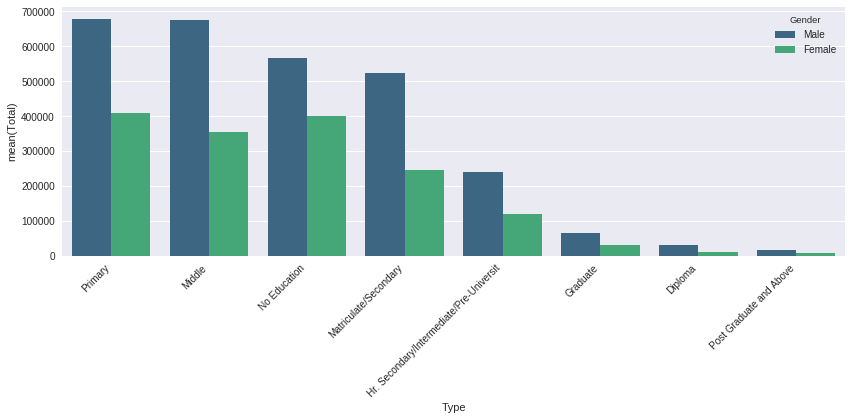

In [0]:
plt.figure(figsize=(12,6))
eduDf = eduDf[['Type','Gender','Total']]
edSort = eduDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',hue='Gender',data=edSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

This bar plot shows us that people with higher education are less likely to commit suicide.

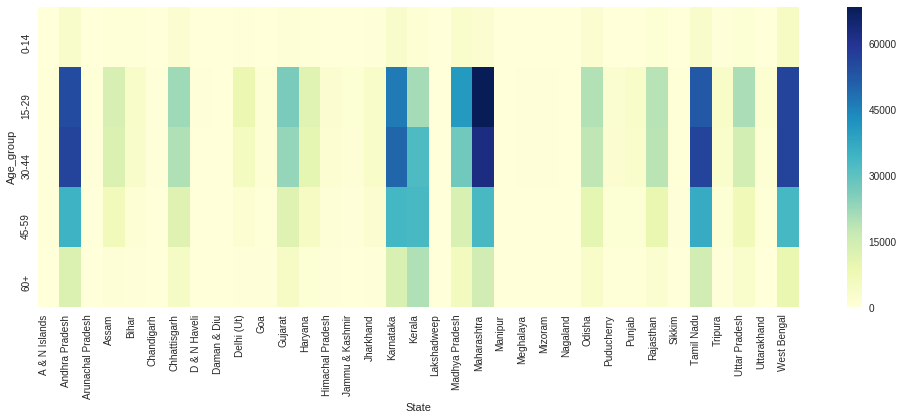

In [0]:
causes = df[df['Type_code']=='Causes']
causesGrp = causes.groupby(['State','Age_group'],as_index=False).sum()
causesGrpPvt = causesGrp.pivot(index='Age_group',columns='State',values='Total')
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causesGrpPvt,cmap='YlGnBu')
plt.tight_layout()

This plot shows us the age group. Suicide among young adults is very high.

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


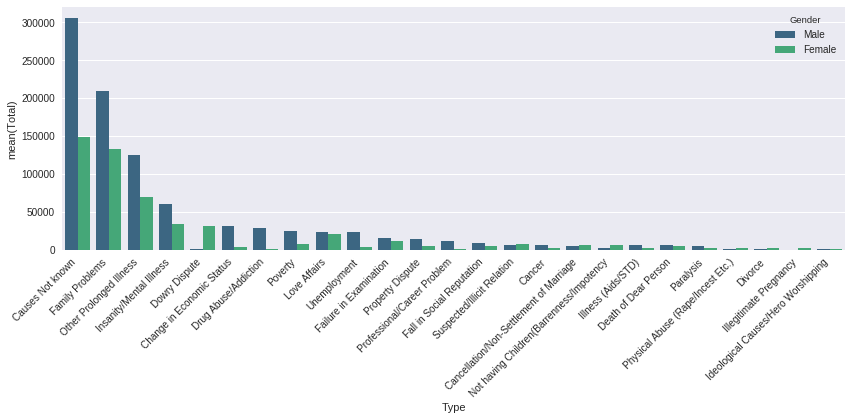

In [0]:
causesDf.is_copy = False
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Bankruptcy or Sudden change in Economic Status','Type'] = 'Change in Economic Status'
causesDf.loc[causesDf['Type']=='Other Causes (Please Specity)','Type'] = 'Causes Not known'
causesDf.loc[causesDf['Type']=='Not having Children (Barrenness/Impotency','Type'] = 'Not having Children(Barrenness/Impotency'
plt.figure(figsize=(12,6))
causesDf = causesDf[['Type','Gender','Total']]
causesSort = causesDf.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
sns.barplot(x='Type',y='Total',data=causesSort,hue='Gender',palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

This graph lists the causes related to suicide with unknown causes taking up the highest number of people. A reason for undocumented cause could be the low education level of the people. It may be illiteracy, the inability to properly communicate, etc. This shows us that the data in different columns is related.

Statistics from the World Health Organization also show the relation between suicide and income.

In [0]:
url1 = 'https://raw.githubusercontent.com/darshxm/dataset-suicides/master/master.csv'
wh = pd.read_csv(url1)
wh

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


The data from all over the world has greater information regarding education, income, etc. Income plots can now be plotted for a better understanding of the data available.

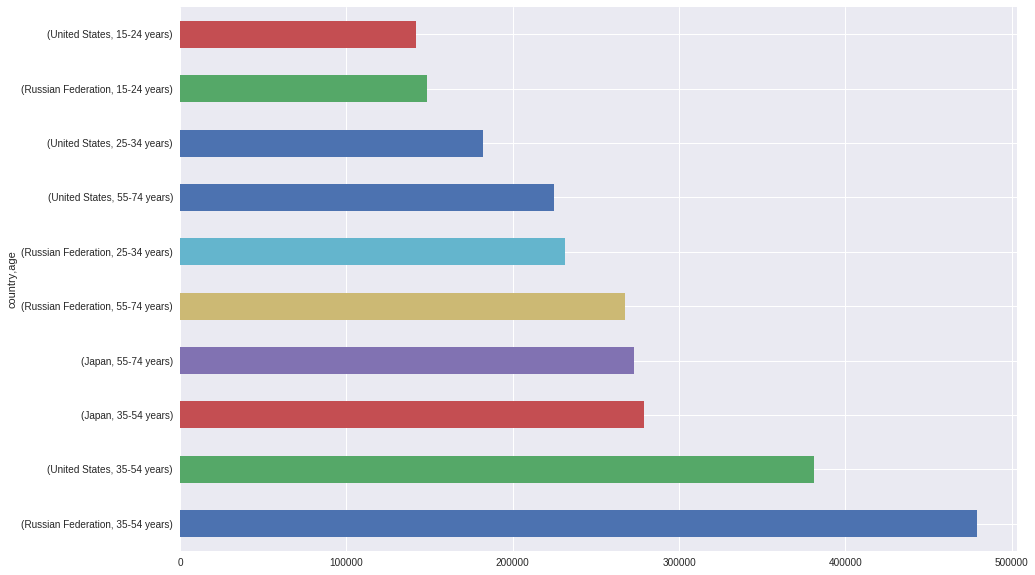

In [0]:
wh.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

From the data we can see the countries with the highest number of suicides by age group.

Now we take the two main things we are comparing, happiness and money vs suicides.

In [0]:
happiness = pd.read_csv('https://raw.githubusercontent.com/darshxm/dataset-suicides/master/2017.csv')
happiness

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


The Happiness rank from all over the world

Below:
Suicides/100k population vs Per Capita Income in 2016, year in which maximum cases were reported.

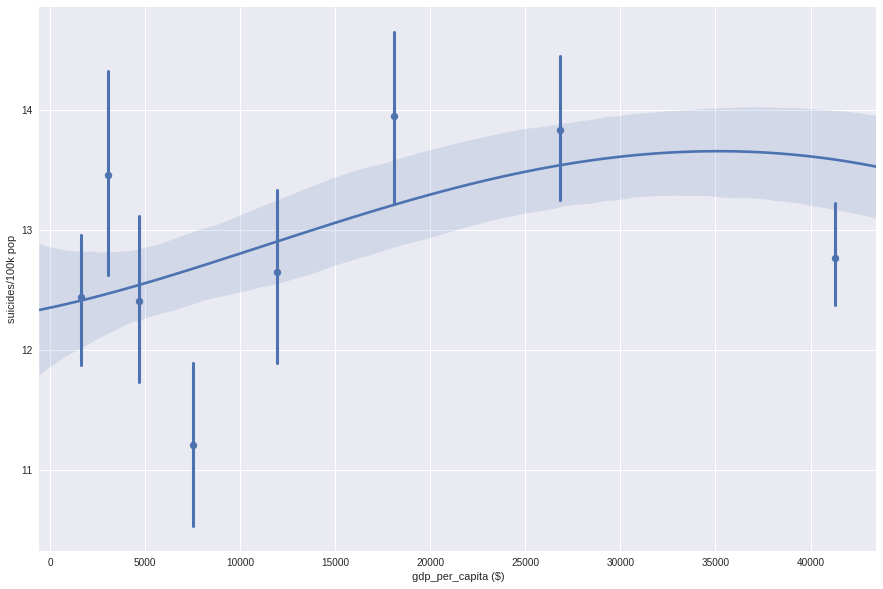

In [0]:


sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
#ax=sns.regplot(data=suicide_socio_economic, x='gdp_per_capita ($)', y='suicides/100k pop', x_estimator=np.median, x_jitter=0.2, order=4, x_bins=5)
ax=sns.regplot(data=wh, x='gdp_per_capita ($)', y='suicides/100k pop', x_jitter=0.2, order=4, x_bins=8)
#ax.set_yscale('log')
#ax.set_xscale('log')



Same plot for all the years from 1985-2016

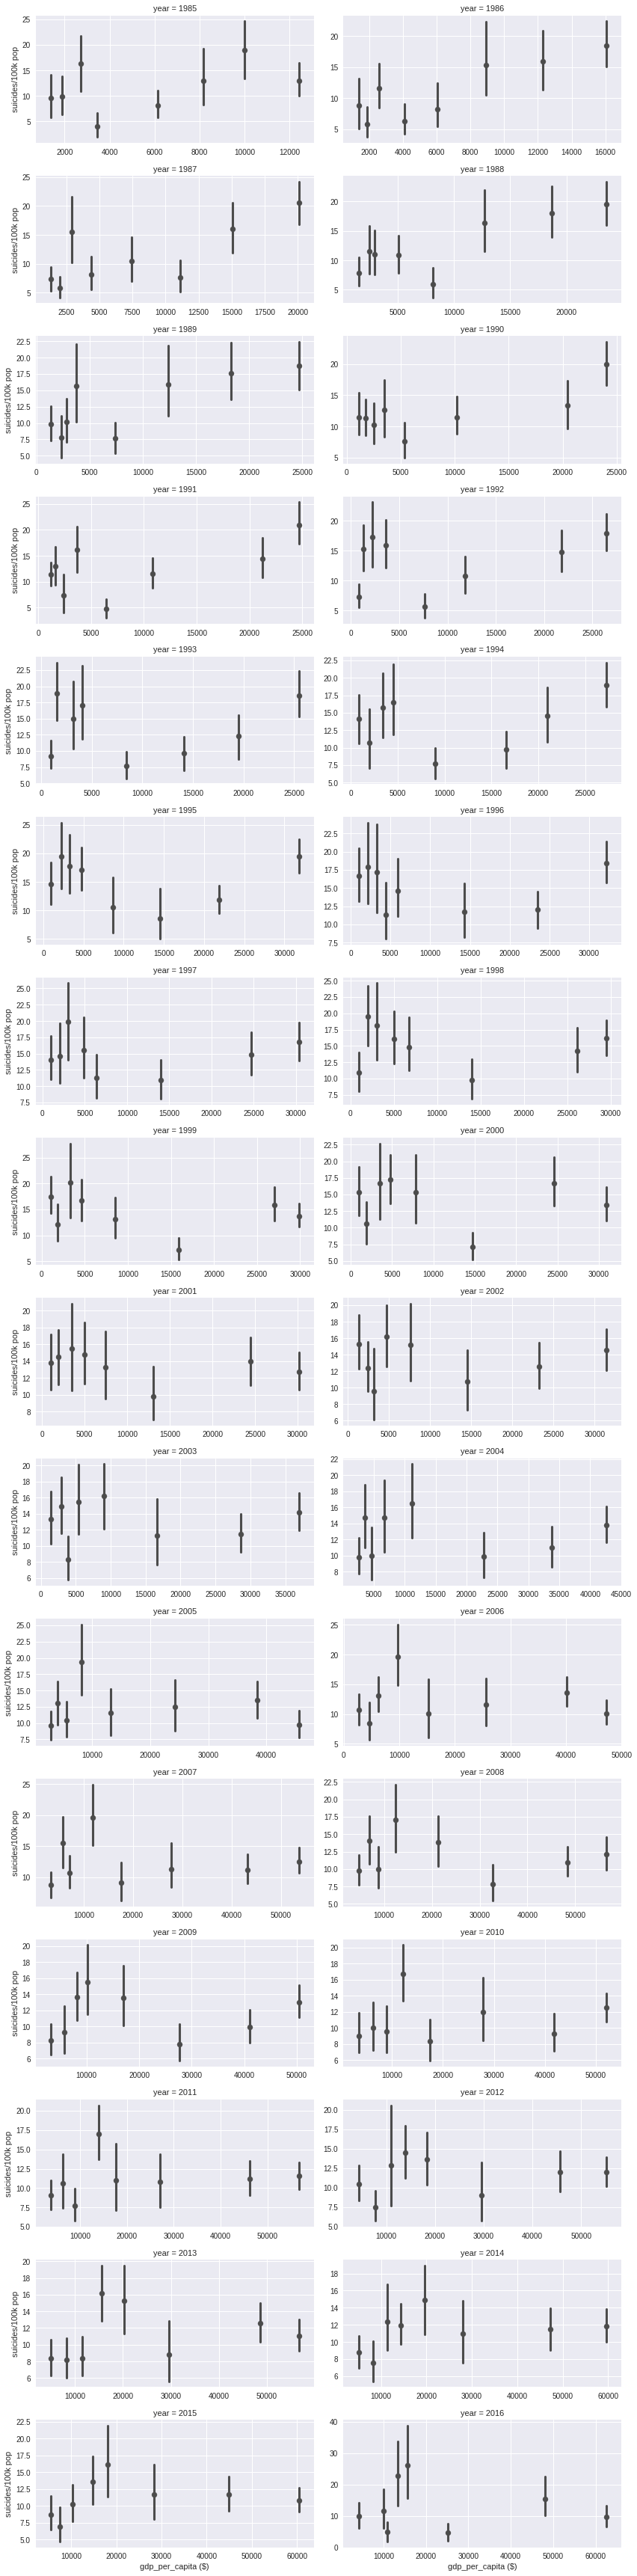

In [0]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
#g = sns.FacetGrid(wh, col="year", margin_titles=True,col_wrap=2, aspect=2, height=4)
g = sns.FacetGrid(wh, col="year", margin_titles=True,col_wrap=2, aspect=2, sharex=False, sharey=False)
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, order=4, fit_reg=False);
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False).set(yscale='log', xscale='log',xlim=(5, None), ylim=(-3, None))
#g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False, x_bins=8).set(yscale='log', xscale='log')
g.map(sns.regplot, "gdp_per_capita ($)", "suicides/100k pop", color=".3", x_jitter=.2, fit_reg=False, x_bins=8)

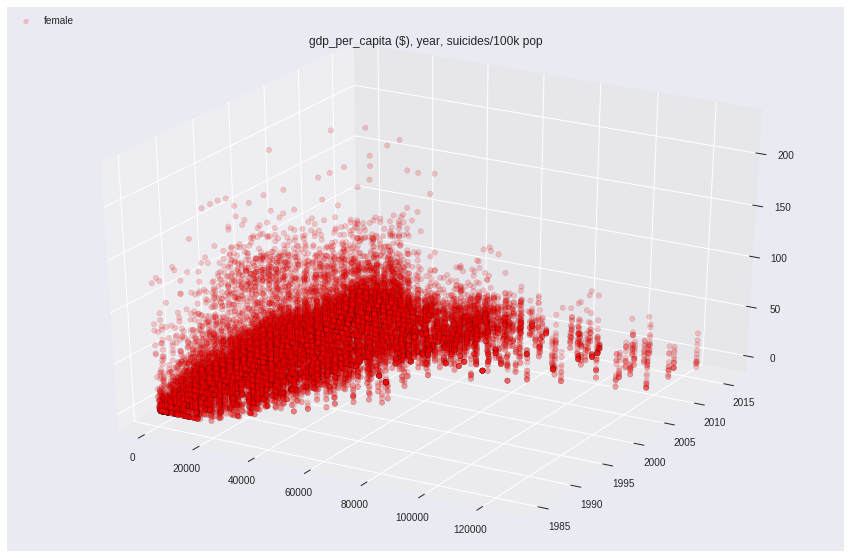

In [0]:
#https://pythonspot.com/3d-scatterplot/
#https://matplotlib.org/gallery/mplot3d/scatter3d.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
 
# Create plot
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wh['gdp_per_capita ($)'], wh.year, wh['suicides/100k pop'], alpha=0.2, c="red", edgecolors='none', s=30, label="female") 
plt.title('gdp_per_capita ($), year, suicides/100k pop')
plt.legend(loc=2)
plt.show()

As we can see, it is concentrated on the lower end of the per capita income. Now, we shall train a model that may show us that people with lesser economic status have a larger probability of committing suicide.

In [0]:
import pathlib


import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


1.13.1


In [0]:
dataset = wh.copy()
dataset.tail()



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


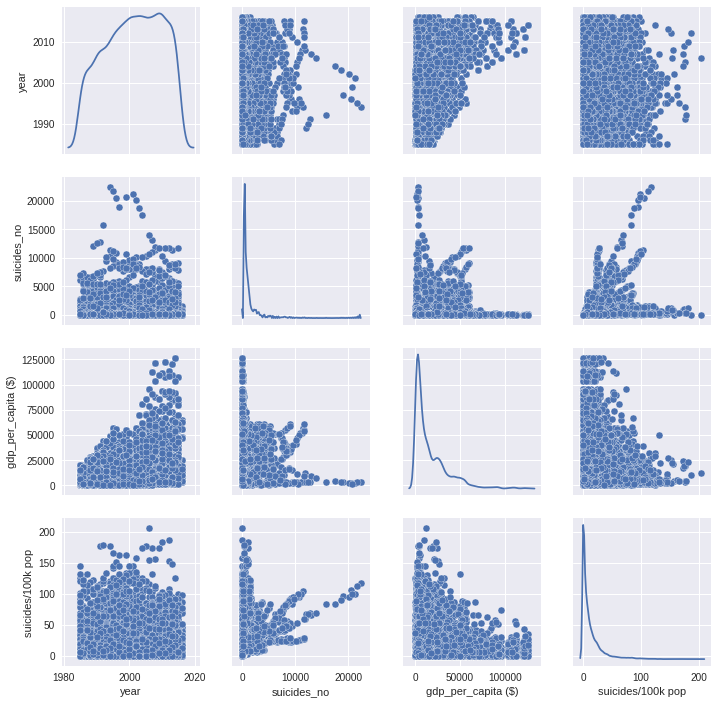

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["country", "year", "suicides_no", "gdp_per_capita ($)", "suicides/100k pop"]], diag_kind="kde")


In [0]:
dataset.columns
suicide = wh.loc[:,'suicides/100k pop']
gdp = wh.loc[:,'gdp_per_capita ($)']
# gdp = wh.loc[:,'suicides_no']
# country = gdp_array

0 loss: 1.0336006e+24
1 loss: inf
2 loss: inf
3 loss: inf
4 loss: inf
5 loss: nan
6 loss: nan
7 loss: nan
8 loss: nan
9 loss: nan
10 loss: nan
11 loss: nan
12 loss: nan
13 loss: nan
14 loss: nan
15 loss: nan
16 loss: nan
17 loss: nan
18 loss: nan
19 loss: nan
20 loss: nan
21 loss: nan
22 loss: nan
23 loss: nan
24 loss: nan
25 loss: nan
26 loss: nan
27 loss: nan
28 loss: nan
29 loss: nan
Predicting


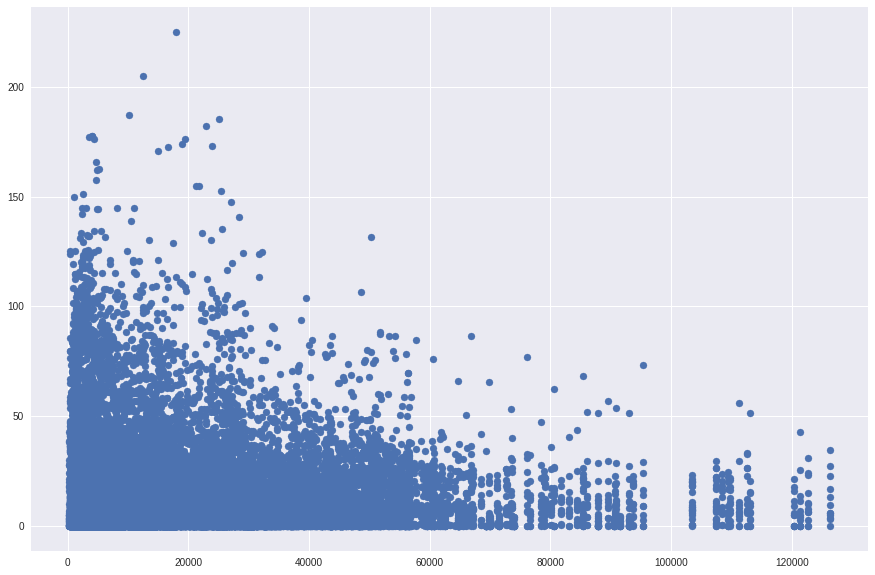

In [0]:
gdp_array = np.array(gdp)
suicide_array = np.array(suicide)
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
		
    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

def run():
#   x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: gdp_array, y: suicide_array}
		
    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : gdp_array})

  plt.scatter(gdp_array, suicide_array)
  plt.plot(gdp_array, y_pred_batch, color='red')
#   plt.xlim(0, 2)
#   plt.ylim(0, 2)
  plt.savefig('plot.png')
  
run()

In [0]:
gdp_array = np.array(gdp)
gdp_array
suicide_array

As seen from the data above, no paarticular output is obtained in the correlation of suicide and income. While it is true that people who are poorer tend to commit suicide more often than those who are more comfortable financially, suicide depends on a myriad of factors that work together, compunding each others' effect and finally driving the person to take that extreme step. This was my research and all of the sources I used have been included below.

Sources
https://qz.com/1001968/artificial-intelligence-can-now-predict-suicide-with-remarkable-accuracy/
https://journals.sagepub.com/doi/pdf/10.1177/2167702617691560
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6035342/
https://github.com/darshxm/dataset-suicides.git